In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/piano_thb.csv')

def renamecols(df, cols=['time','temp','baro','rel_hum']):
    df.columns = cols
    return df

def time_idx(df, timecol='time'):
    df[timecol] = [pd.Timestamp(t, unit='s', tz='US/Eastern') for t in df[timecol]]
    return df.set_index(timecol)

def quickplot(df, cols):
    if len(cols) > 1: df = (df - df.mean()) / df.std()
    fig, ax = plt.subplots(figsize=(15,7))
    _ = [sns.lineplot(x=df.index,y=col,data=df, ax=ax, label=col) for col in cols]

In [7]:
df = time_idx(renamecols(df))

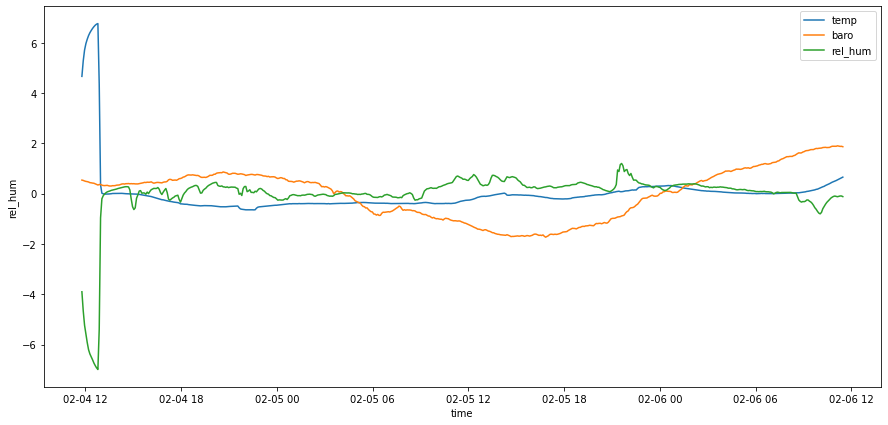

In [8]:
quickplot(df, df)

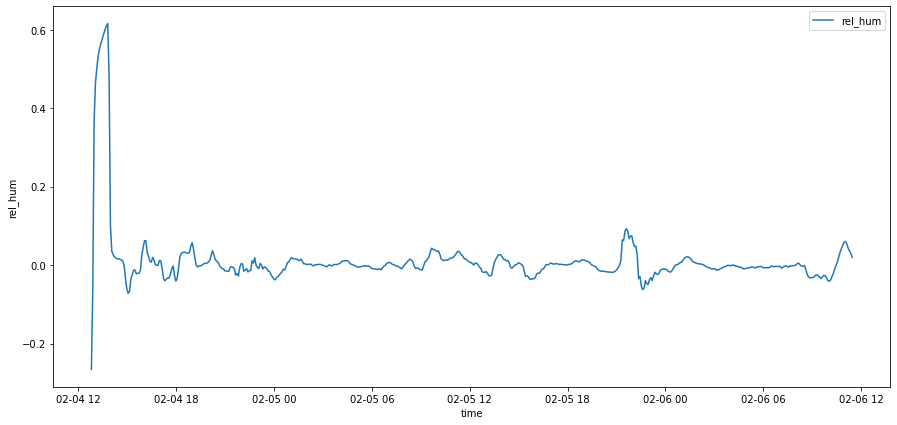

In [9]:
quickplot(df.rolling(12).mean().diff(1), ['rel_hum'])

In [49]:
data

,temp,baro,rel_hum
time,,,
2021-02-04 16:47:33,4.620136,0.613014,-3.857667
2021-02-04 16:52:34,5.227185,0.598972,-4.605865
2021-02-04 16:57:34,5.655007,0.575257,-5.173206
2021-02-04 17:02:35,5.906668,0.558552,-5.523132
2021-02-04 17:07:35,6.079148,0.549167,-5.848626
...,...,...,...
2021-02-06 14:47:16,0.179385,1.919308,-0.621846
2021-02-06 14:52:17,0.187364,1.914760,-0.703885
2021-02-06 14:57:17,0.210688,1.925262,-0.772155
